In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
home_credit_des = pd.read_csv('HomeCredit_columns_description.csv',encoding='ISO-8859-1')

In [3]:
home_credit_des

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [4]:
application_train = pd.read_csv('application_train.csv')

In [5]:
application_train.duplicated().sum()

0

In [6]:
application_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
application_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
application_train.shape

(307511, 122)

In [11]:
(application_train.isnull().sum()/len(application_train)*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

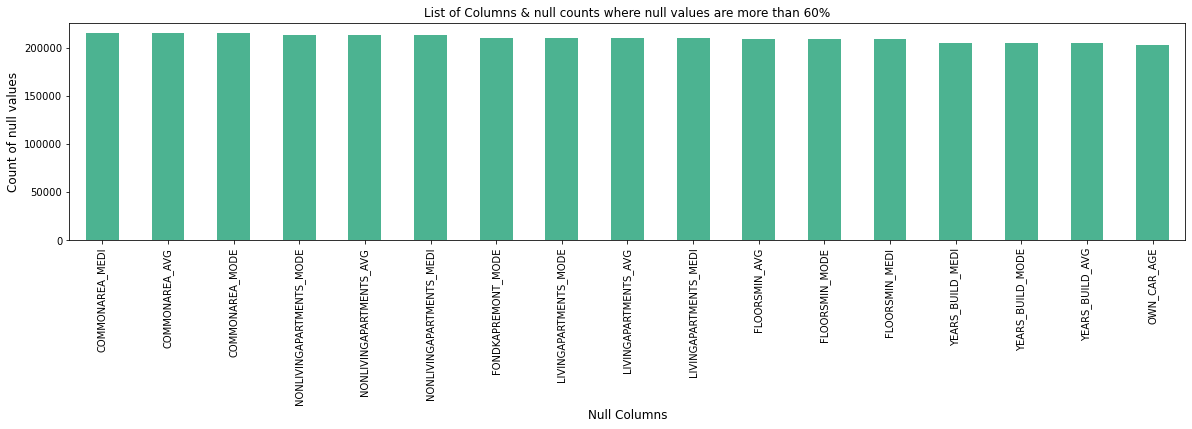

In [12]:
null_col = application_train.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.6*len(application_train))]
len(null_col)
#các cột có giá trị null trên 60%

#Plot
plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('List of Columns & null counts where null values are more than 60%') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()


# Drop cột có giá trị null trên 60%

In [13]:
label = list(null_col.index.values) #Tạo list có null trên 60%
application_train.drop(labels = label,axis=1,inplace = True) #Droping those columns

In [14]:
application_train.shape

(307511, 105)

In [15]:
null = (application_train.isnull().sum()/len(application_train)*100).sort_values(ascending = False).head(50)
null.head(70)

LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56.381073
NONLIVINGAREA_AVG               55.179164
NONLIVINGAREA_MEDI              55.179164
NONLIVINGAREA_MODE              55.179164
ELEVATORS_MEDI                  53.295980
ELEVATORS_AVG                   53.295980
ELEVATORS_MODE                  53.295980
WALLSMATERIAL_MODE              50.840783
APARTMENTS_MODE                 50.749729
APARTMENTS_AVG                  50.749729
APARTMENTS_MEDI                 50.749729
ENTRANCES_MODE                  50.348768
ENTRANCES_MEDI                  50.348768
ENTRANCES_AVG                   50.348768
LIVINGAREA_MEDI                 50.193326
LIVINGAREA_MODE                 50.193326
LIVINGAREA_AVG                  50.193326
HOUSETYPE_MODE                  50

In [16]:
#fillna
application_train.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(application_train.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

application_train.AMT_REQ_CREDIT_BUREAU_MON.fillna(application_train.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

application_train.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(application_train.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

application_train.AMT_REQ_CREDIT_BUREAU_DAY.fillna(application_train.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

application_train.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(application_train.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

application_train.AMT_REQ_CREDIT_BUREAU_QRT.fillna(application_train.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

application_train.NAME_TYPE_SUITE.fillna(application_train.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

application_train.OBS_30_CNT_SOCIAL_CIRCLE.fillna(application_train.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

application_train.DEF_30_CNT_SOCIAL_CIRCLE.fillna(application_train.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

application_train.OBS_60_CNT_SOCIAL_CIRCLE.fillna(application_train.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

application_train.DEF_60_CNT_SOCIAL_CIRCLE.fillna(application_train.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

application_train.CNT_FAM_MEMBERS.fillna(application_train.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

application_train.DAYS_LAST_PHONE_CHANGE.fillna(application_train.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

application_train.EXT_SOURCE_2.fillna(application_train.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

application_train.EXT_SOURCE_3.fillna(application_train.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

In [17]:
null = (application_train.isnull().sum()/len(application_train)*100).sort_values(ascending = False).head(50)
null.head(70)

LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56.381073
NONLIVINGAREA_MODE              55.179164
NONLIVINGAREA_AVG               55.179164
NONLIVINGAREA_MEDI              55.179164
ELEVATORS_MODE                  53.295980
ELEVATORS_AVG                   53.295980
ELEVATORS_MEDI                  53.295980
WALLSMATERIAL_MODE              50.840783
APARTMENTS_MEDI                 50.749729
APARTMENTS_AVG                  50.749729
APARTMENTS_MODE                 50.749729
ENTRANCES_MODE                  50.348768
ENTRANCES_AVG                   50.348768
ENTRANCES_MEDI                  50.348768
LIVINGAREA_MODE                 50.193326
LIVINGAREA_AVG                  50.193326
LIVINGAREA_MEDI                 50.193326
HOUSETYPE_MODE                  50

# Vẫn còn những cột percenrtage missing 35%đến 60% tôi chưa xem thì có gì mọi người xem chỗ đấy fill như nào nhé 

In [18]:
application_train.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
application_train.drop(labels=unwanted,axis=1,inplace=True)

In [20]:
df = pd.DataFrame(unwanted).value_counts()
df

REGION_RATING_CLIENT_W_CITY    2
REGION_RATING_CLIENT           2
FLAG_EMAIL                     2
FLAG_DOCUMENT_10               1
FLAG_WORK_PHONE                1
FLAG_PHONE                     1
FLAG_MOBIL                     1
FLAG_EMP_PHONE                 1
FLAG_DOCUMENT_9                1
FLAG_DOCUMENT_8                1
FLAG_DOCUMENT_7                1
FLAG_DOCUMENT_6                1
FLAG_DOCUMENT_5                1
FLAG_DOCUMENT_4                1
FLAG_CONT_MOBILE               1
FLAG_DOCUMENT_21               1
FLAG_DOCUMENT_20               1
FLAG_DOCUMENT_2                1
FLAG_DOCUMENT_19               1
FLAG_DOCUMENT_18               1
FLAG_DOCUMENT_17               1
FLAG_DOCUMENT_16               1
FLAG_DOCUMENT_15               1
FLAG_DOCUMENT_14               1
FLAG_DOCUMENT_13               1
FLAG_DOCUMENT_12               1
FLAG_DOCUMENT_11               1
FLAG_DOCUMENT_3                1
dtype: int64

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_41273/3082089346.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(numeric_df_corr, dtype=np.bool)


<AxesSubplot:>

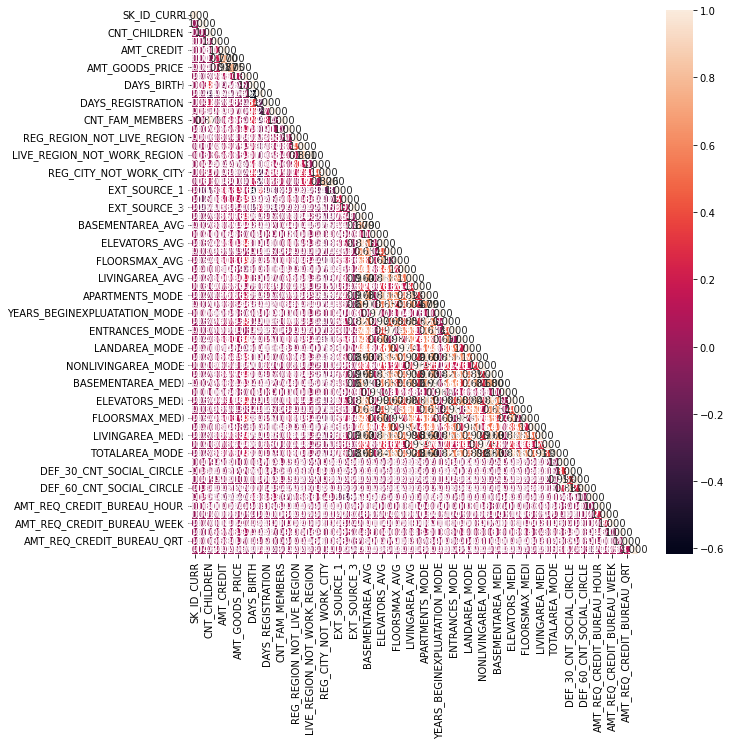

In [21]:
numeric_df = application_train._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

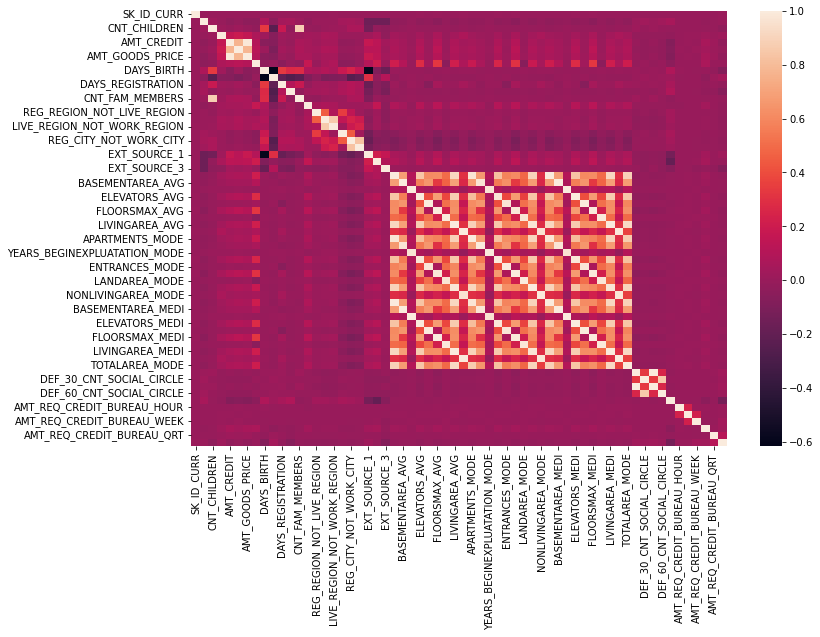

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(application_train.corr())

plt.show()

# Handle Outliers

In [23]:
numerical_col = application_train.select_dtypes(include='number').columns
len(numerical_col)

62

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_41273/1191476894.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ma

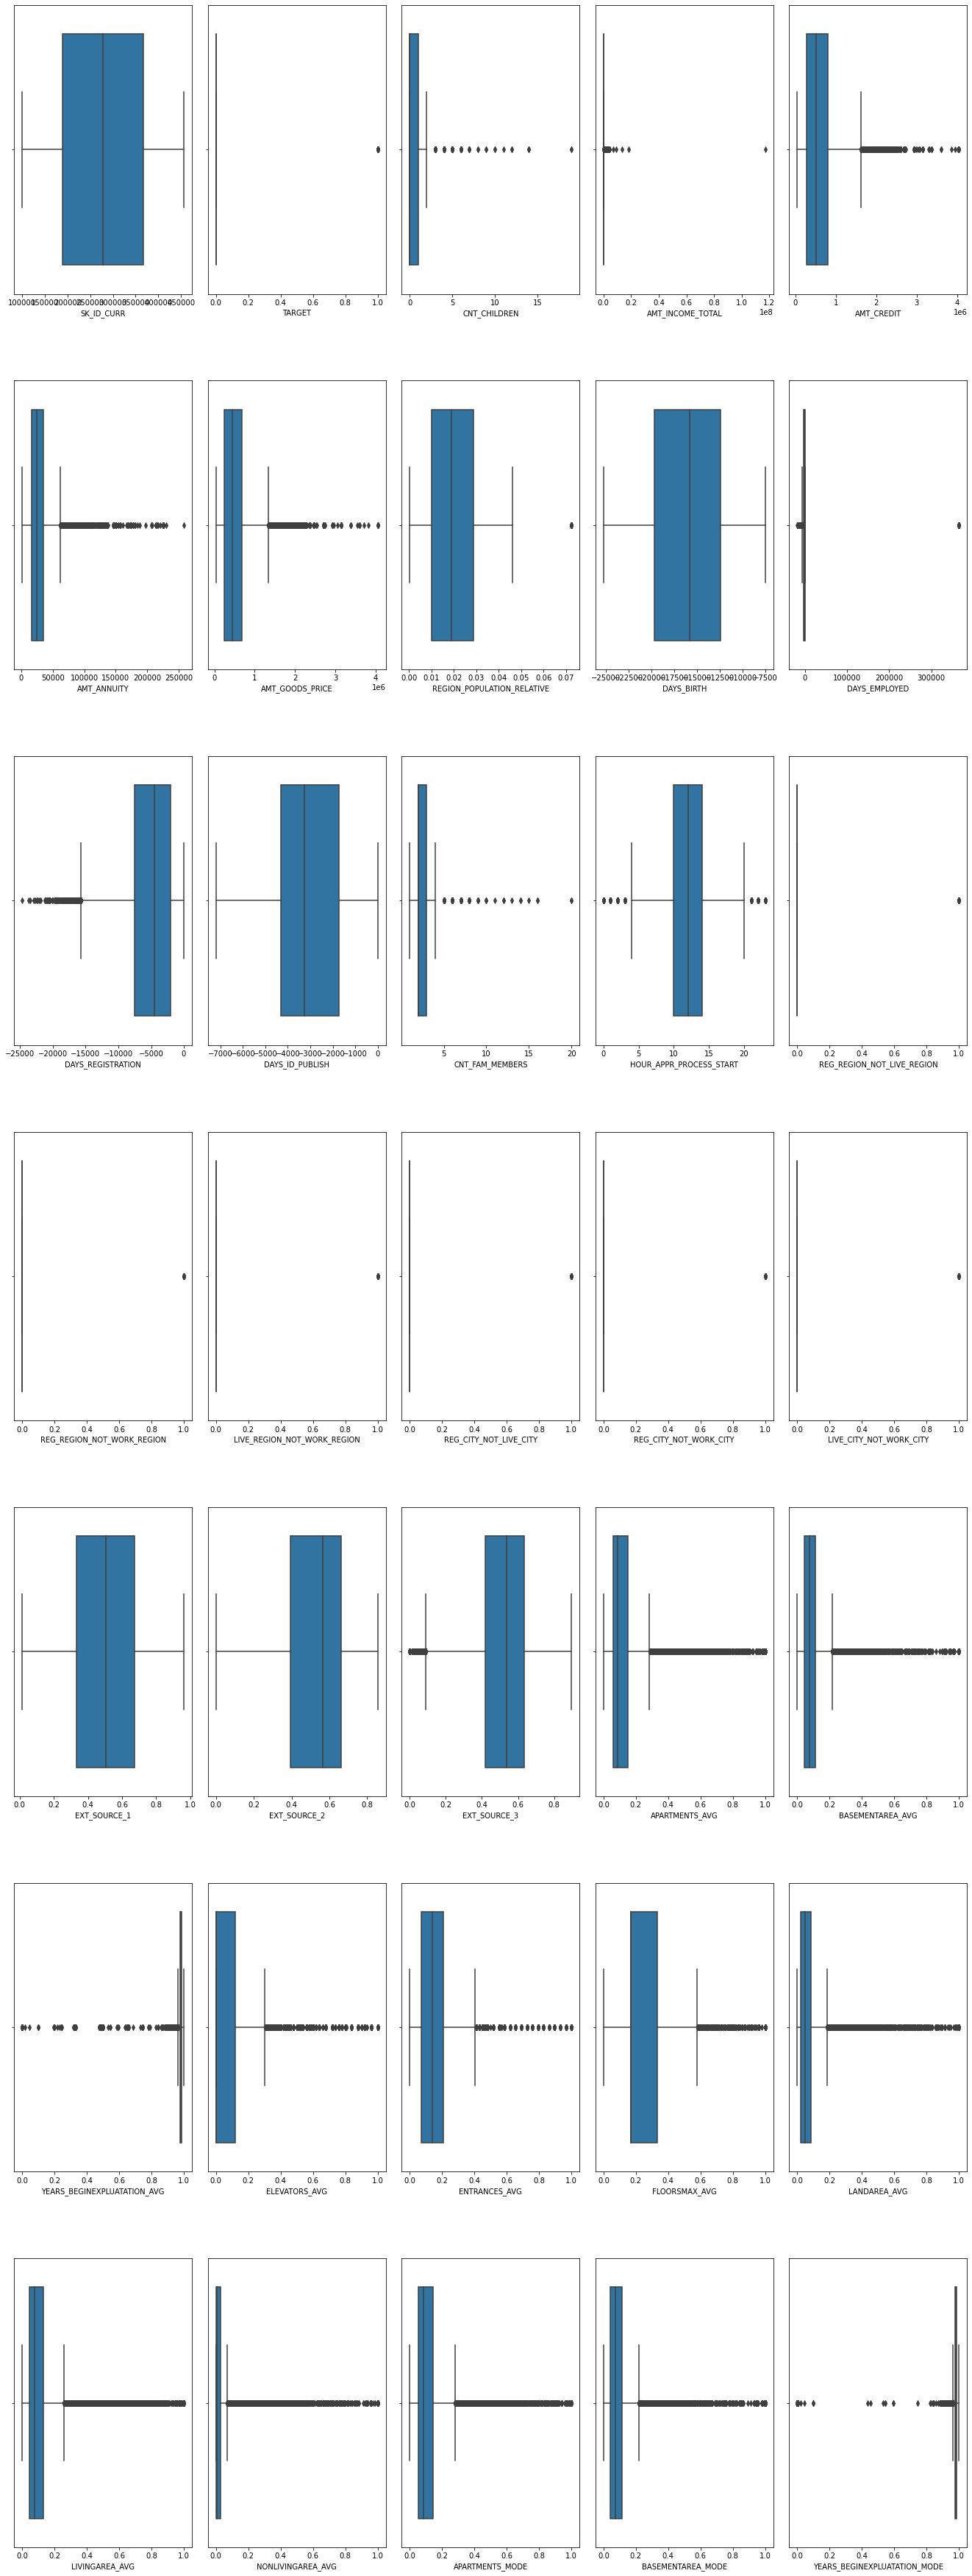

In [24]:
fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop 

    sns.boxplot(application_train[column],ax=ax)   #Ploting

# CNT_CHILDREN có giá trị ngoại lệ khi có con trên 5 tuổi.
# IQR cho AMT_INCOME_TOTAL rất ít và nó có một số lượng lớn các ngoại lệ.
# Phần tư thứ ba của AMT_CREDIT lớn hơn so với phần tư thứ nhất, có nghĩa là phần lớn Số tiền Tín dụng của khoản vay của khách hàng nằm trong phần tư thứ ba. Và có một số lượng lớn các trường hợp ngoại lệ có mặt trong AMT_CREDIT.
# Phần tư thứ ba AMT_ANNUITY lớn hơn một chút so với phần tư thứ nhất và có một số lượng lớn các giá trị ngoại lệ.
# Phần tư thứ ba của AMT_GOODS_PRICE, DAYS_REGISTRATION VÀ DAYS_LAST_PHONE_CHANGE lớn hơn so với phần tư thứ nhất và tất cả đều có số lượng lớn các ngoại lệ.
# IQR cho DAYS EMPLOYED rất ít. Hầu hết các giá trị ngoại lệ có mặt dưới 25000. Và một giá trị ngoại lệ hiện tại là 375000.
# Từ sơ đồ của CNT_FAM_MEMBERS, chúng ta có thể nói rằng hầu hết các khách hàng có 4 thành viên gia đình. Có một số ngoại lệ hiện tại.
# DAYS_BIRTH, DAYS_ID_PUBLISH và EXT_SOURCE_2, EXT_SOURCE_3 không có bất kỳ ngoại lệ nào.
# Boxplot for DAYS_EMPLOYED ,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, 
# FLAG_OWN_CAR: Nó không có định lượng Thứ nhất và Thứ ba và các giá trị nằm trong IQR, Vì vậy, ta có thể kết luận rằng hầu hết khách hàng đều sở hữu một chiếc ô tô
# FLAG_OWN_REALTY: Nó không có định lượng First và Third và các giá trị nằm trong IQR, Vì vậy, tai có thể kết luận rằng hầu hết khách hàng sở hữu Nhà / Căn hộ

In [25]:
a = application_train['NAME_CONTRACT_TYPE'].value_counts()

In [26]:
a = pd.DataFrame(a)

Text(0.5, 1.0, 'Did People Repay on Time ?')

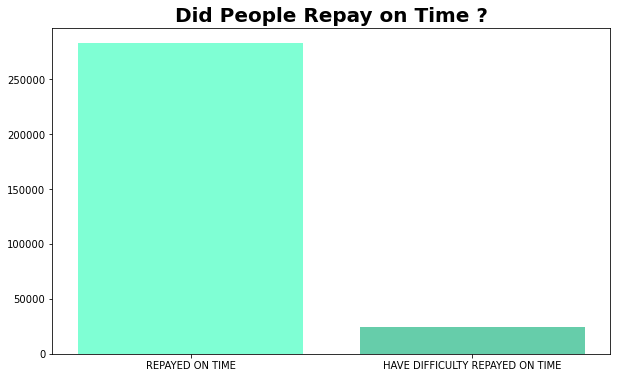

In [27]:
a = application_train["TARGET"].value_counts()
df = pd.DataFrame(a).reset_index()
df
fig,ax0 = plt.subplots(figsize = (10,6))
ax0.bar(df.index,df.TARGET,color = ['#7FFFD4', '#66CDAA'])
ax0.set_xticks([0,1])
x= ["REPAYED ON TIME", 'HAVE DIFFICULTY REPAYED ON TIME' ]
plt.xticks([0,1], x)
plt.title('Did People Repay on Time ?',size = 20,weight ='bold')

# Đa số mọi người trả đúng hạn
# Tuy nhiên ở đây xảy ra trường hợp mất cân bằng dữ liệu (imbalanced dataset)
# Mất cân bằng dữ liệu là một trong những hiện tượng phổ biến của bài toán phân loại nhị phân (binary #classification) như spam email, phát hiện gian lận, dự báo vỡ nợ, chuẩn đoán bệnh lý,…. Trong trường hợp tỷ lệ dữ liệu giữa 2 classes là 50:50 thì được coi là cân bằng. Khi có sự khác biệt trong phân phối giữa 2 classes, chẳng hạn 60:40 thì dữ liệu có hiện tượng mất cân bằng.

# Hầu hết các bộ dữ liệu đều khó đạt được trạng thái cân bằng mà luôn có sự khác biệt về tỷ lệ giữa 2 classes. Đối với những trường hợp dữ liệu mất cân bằng nhẹ như tỷ lệ 60:40 thì sẽ không ảnh hưởng đáng kể tới khả năng dự báo của mô hình.

# Tuy nhiên nếu hiện tượng mất cân bằng nghiêm trọng xảy ra, chẳng hạn như tỷ lệ 90:10 sẽ thường dẫn tới ngộ nhận chất lượng mô hình. Khi đó thước đo đánh giá mô hình là độ chính xác (accuracy) có thể đạt được rất cao mà không cần tới mô hình. Ví dụ, một dự báo ngẫu nhiên đưa ra tất cả đều là nhóm đa số thì độ chính xác đã đạt được là 90%. Do đó không nên lựa chọn độ chính xác làm chỉ số đánh giá mô hình để tránh lạc quan sai lầm về chất lượng

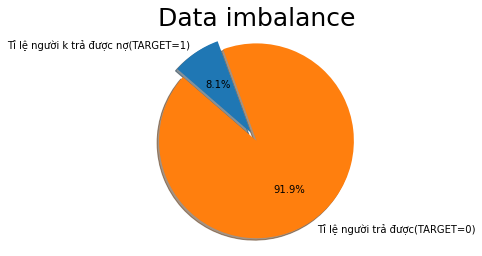

In [28]:
count1 = 0 
count0 = 0
for i in application_train['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(application_train['TARGET']))*100
count0 = (count0/len(application_train['TARGET']))*100

x = ['Tỉ lệ người k trả được nợ(TARGET=1)','Tỉ lệ người trả được(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  #Vẽ hình tròn
plt.title('Data imbalance',fontsize=25)
plt.show()

In [29]:
 application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Text(0.89, 109000, '105059')

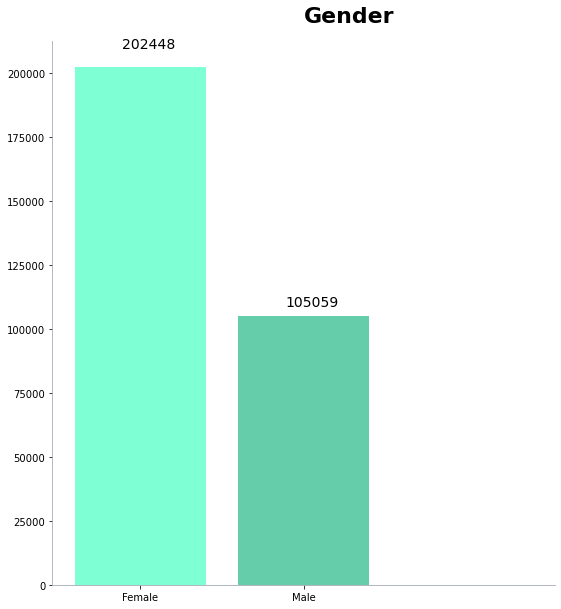

In [30]:
a = application_train["CODE_GENDER"].value_counts()
df = pd.DataFrame(a).reset_index()
df
fig,ax0 = plt.subplots(figsize = (9,10))
ax0.bar(df.index,df.CODE_GENDER,color = ['#7FFFD4', '#66CDAA','blue'])
x= ["Female", 'Male' ]
plt.xticks([0,1],x)
ax0.spines[['top', "right"]].set_visible(False)
ax0.text(1, 220000, 'Gender', size=22, weight="bold")
ax0.spines[['left', 'bottom']].set_color('#a1a6b3')
ax0.text(-0.115, 210000, '202448', size="14", alpha=1)
ax0.text(0.89,109000, '105059', size="14", alpha=1)

# Số lượng Female vay tiền gần như là gấp đôi so với Male


In [31]:
  # Tính % của nam và nữ gặp khó khăn( hoặc không trả được) trong khoản vay('Target = 1')
perc_m_and_f = application_train[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()

In [32]:
perc_m_and_f

,CODE_GENDER,TARGET
0,F,0.069993
1,M,0.101419
2,XNA,0.000000


In [33]:
#XNA là null

In [34]:
application_train.CODE_GENDER.value_counts()
application_train.loc[application_train.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
application_train.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Text(0.5, 1.0, 'Percentage of M and F have difficulty repayed on time(%)')

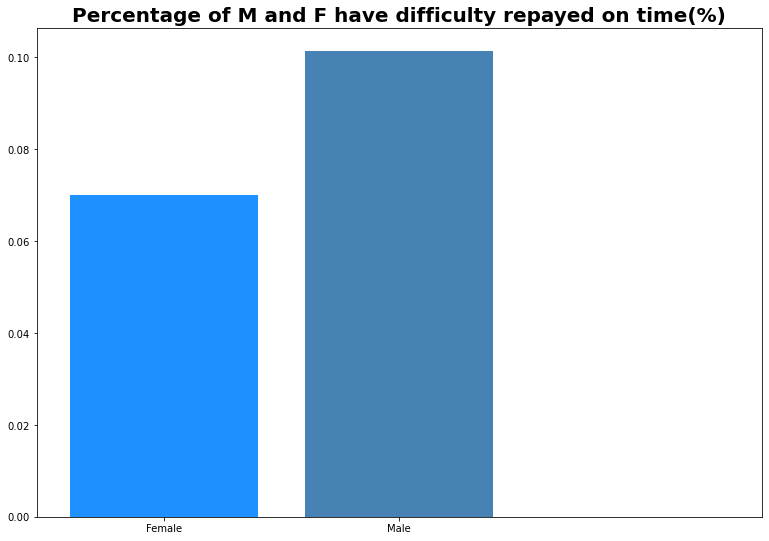

In [35]:

df = pd.DataFrame(perc_m_and_f).reset_index()
df
fig,ax = plt.subplots(figsize = (13,9))
ax.bar(df.index,df.TARGET,color = ["#1E90FF", "#4682B4"])
x= ["Female", 'Male']
plt.xticks([0,1], x)
ax.set_title('Percentage of M and F have difficulty repayed on time(%)', loc='center', size="20",weight = 'bold')


# Mặc dù số lượng Female gần như gấp đôi, nhưng tỉ lệ gặp khó khăn trong việc trả nợ của Male lại là xấp xỉ 10% còn Female là 7%

# Độ Tuổi của những người vay

In [36]:
application_train[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


# Nếu để ý , t sẽ thấy rằng đây là ngày, nhưng nó chứa các giá trị âm không hợp lệ. Như vậy, phải convert lại.

In [37]:
def convert_age(age_days_negative):
    age_days_positive = -age_days_negative
    age_years = age_days_positive/365 
    return age_years
application_train['DAYS_BIRTH'] =  application_train['DAYS_BIRTH'].apply(convert_age)
application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED'].apply(convert_age)

In [38]:
day_col = ["DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]

In [39]:
application_train[day_col]= abs(application_train[day_col])

In [40]:
#TEST
print(application_train['DAYS_ID_PUBLISH'].unique())

[2120  291 2531 ... 6194 5854 6211]


# # Plot the distribution of ages in years

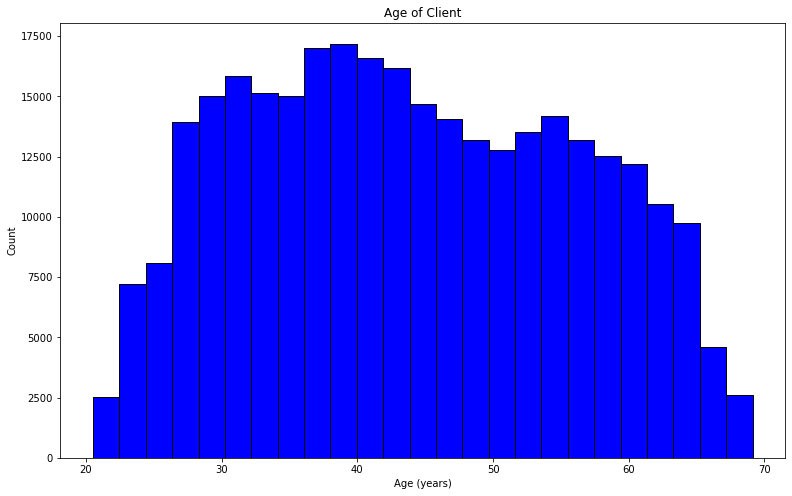

In [41]:

fig,ax = plt.subplots(figsize = (13,8))


plt.hist(application_train['DAYS_BIRTH'], color = 'blue', edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [42]:
cat_perc = application_train[['DAYS_BIRTH', 'TARGET']].groupby([application_train['DAYS_BIRTH']],as_index=False).mean()

In [43]:
application_train['DAYS_BIRTH']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: DAYS_BIRTH, Length: 307511, dtype: float64

Text(0, 0.5, 'Number')

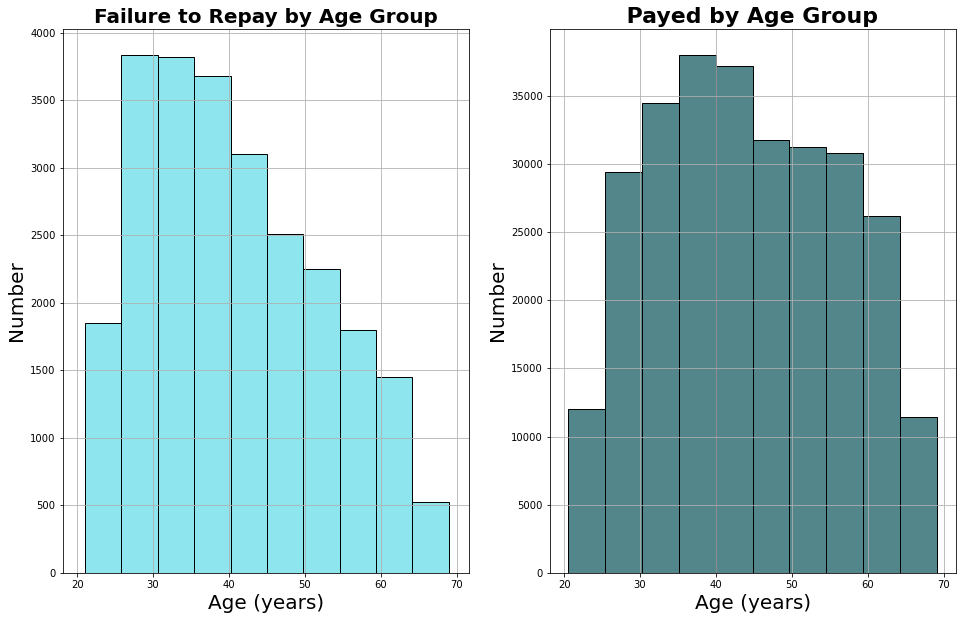

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=  2, sharex = True, figsize = (16, 10))
ax1.hist(application_train[application_train['TARGET']==1]['DAYS_BIRTH'],color='#8EE5EE', edgecolor = 'k', label='Target=1')
ax1.set_xticks(np.arange(0, 71,10))
ax1.set_title('Failure to Repay by Age Group', weight = 'bold', size="20")
ax1.grid()
ax1.set_xlabel('Age (years)',size = 20)
ax1.set_ylabel('Number',size = 20)



ax2.hist(application_train[application_train['TARGET']==0]['DAYS_BIRTH'],color = '#53868B',edgecolor = 'k', label='Target=1')
ax2.set_title(' Payed by Age Group ', weight = 'bold', size="22")
ax2.grid()
ax2.set_xlabel('Age (years)',size = 20)
ax2.set_ylabel('Number',size = 20)

# Có thể thấy những người k trả đc nợ nằm ở quanh ngưỡng 30 tuổi, tuy nhiên số lượng người đó giảm đi khi độ tuổi tăng lên
# Từ đó thấy có thể kết luận rằng những người trẻ thường k có khả năng trả nợ trong thời hạn
# Yếu tố tuổi rất quan trọng nên rất cần cho vào model Machine Learning

In [45]:
application_train['NAME_FAMILY_STATUS']

0         Single / not married
1                      Married
2         Single / not married
3               Civil marriage
4         Single / not married
                  ...         
307506               Separated
307507                   Widow
307508               Separated
307509                 Married
307510                 Married
Name: NAME_FAMILY_STATUS, Length: 307511, dtype: object

In [46]:
perc_fam_status = application_train[['NAME_FAMILY_STATUS', 'TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean()

In [47]:
perc_fam_status

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
1,Married,0.075599
2,Separated,0.081942
3,Single / not married,0.098077
4,Unknown,0.000000
5,Widow,0.058242


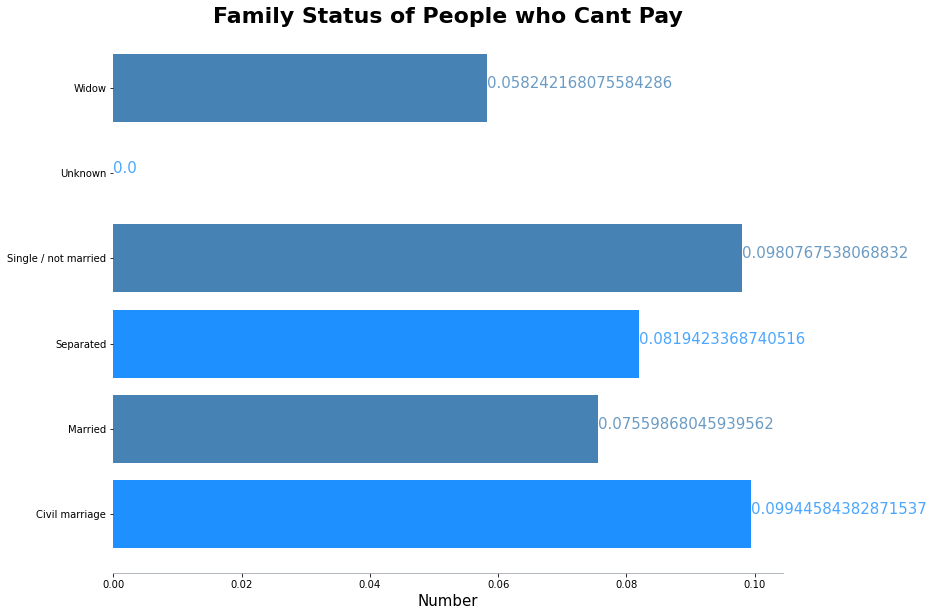

In [48]:
fig, ax = plt.subplots(figsize=(12, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.barh(perc_fam_status["NAME_FAMILY_STATUS"], perc_fam_status["TARGET"], color=color, alpha = 1)
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')

ax.set_xlabel('Number', size = "15")
ax.set_title('Family Status of People who Cant Pay', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")
ax.set_title('Family Status of People who Cant Pay', weight = 'bold', size="22")
for i in range(len(perc_fam_status)):
    ax.text(perc_fam_status['TARGET'][i] , i, f"{float(perc_fam_status['TARGET'][i])}", color =color[i], size="15", alpha = 0.8)

# Xét về tỷ lệ không trả được nợ, Hôn nhân dân sự có tỷ lệ không trả được cao nhất (10%), với Widow là thấp nhất (ngoại trừ Unknow).

In [49]:
nbr_children = application_train[['CNT_CHILDREN', 'TARGET']].groupby(['CNT_CHILDREN'],as_index=False).count()

In [50]:
nbr_children 

,CNT_CHILDREN,TARGET
0,0,215371
1,1,61119
2,2,26749
3,3,3717
4,4,429
5,5,84
6,6,21
7,7,7
8,8,2
9,9,2


In [51]:
perc_children = application_train[['CNT_CHILDREN', 'TARGET']].groupby(['CNT_CHILDREN'],as_index=False).mean()

In [52]:
perc_children.sort_values(by='TARGET', ascending=False, inplace=True)

In [53]:
perc_children 

,CNT_CHILDREN,TARGET
9,9,1.000000
11,11,1.000000
6,6,0.285714
4,4,0.128205
3,3,0.096314
1,1,0.089236
2,2,0.087218
5,5,0.083333
0,0,0.077118
7,7,0.000000


Text(0.5, 0, 'Number')

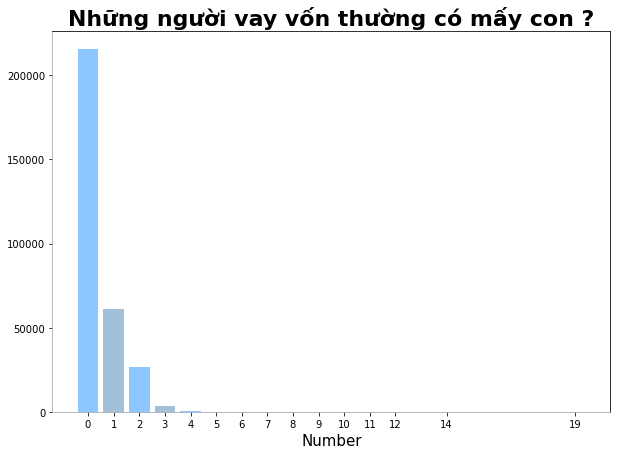

In [54]:
fig, ax = plt.subplots(figsize=(10, 7))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(nbr_children["CNT_CHILDREN"], nbr_children["TARGET"], color=color, alpha = 0.5)
#ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(nbr_children['CNT_CHILDREN'])
ax.set_xlabel('Number', size = "15")
ax.set_title('Những người vay vốn thường có mấy con ?', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")



# Hầu hết khách hàng vay vốn đều không có con. Số lượng khoản vay của khách hàng có một con  bằng 1/4 so với k có con, số lượng khoản vay của khách hàng có hai con bằng 1/8; khách hàng có 3, 4 con trở lên hiếm hơn nhiều.

Text(0.5, 0, 'Number')

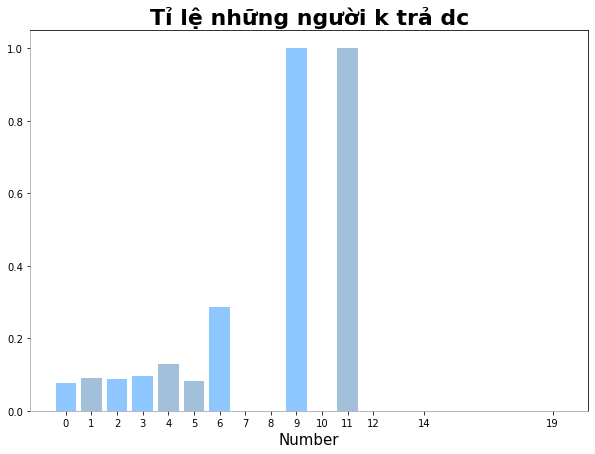

In [55]:
fig, ax = plt.subplots(figsize=(10, 7))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(perc_children["CNT_CHILDREN"], perc_children["TARGET"], color=color, alpha = 0.5)
#ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(perc_children['CNT_CHILDREN'])
ax.set_xlabel('Number', size = "15")
ax.set_title('Tỉ lệ những người k trả dc', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")





# Đối với việc trả nợ, những khách hàng không có con, 1, 2, 3 và 5 có tỷ lệ không trả nợ ở mức trung bình (10%). Các khách hàng có 4 và 6 con ở mức trên trung bình về tỷ lệ phần trăm khoản vay chưa hoàn trả (trên 25% đối với gia đình có 6 con).

 # Đối với khách hàng có 9 hoặc 11 con, tỷ lệ khoản vay không được hoàn trả là 100%.

In [56]:
nbr_fam_mem = application_train[['CNT_FAM_MEMBERS', 'TARGET']].groupby(['CNT_FAM_MEMBERS'],as_index=False).count()

In [57]:
nbr_fam_mem

,CNT_FAM_MEMBERS,TARGET
0,1.0,67847
1,2.0,158357
2,3.0,52601
3,4.0,24697
4,5.0,3478
5,6.0,408
6,7.0,81
7,8.0,20
8,9.0,6
9,10.0,3


Text(0.5, 0, 'Number')

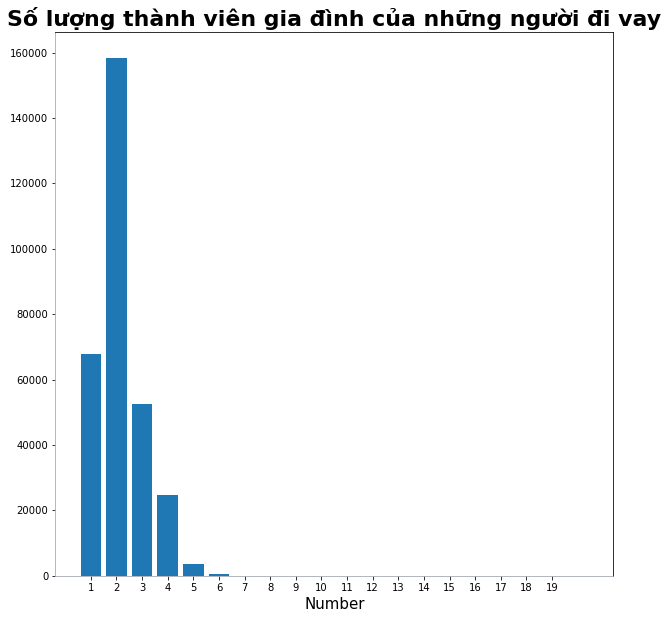

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(nbr_fam_mem['CNT_FAM_MEMBERS'], nbr_fam_mem['TARGET'])
ax.spines[['top', "right", 'left']].set_visible(True)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(np.arange(1, 20,1))

ax.set_xlabel('Number', size = "15")
ax.set_title('Số lượng thành viên gia đình của những người đi vay', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")



# # Khách hàng có thành viên gia đình gồm 2 người là nhiều nhất, tiếp theo là 1 (người độc thân), 3 (gia đình có một con) và 4. Tuy nhiên số lượng ngày càng ít khi số thành viên tăng lên

In [59]:
# Tỉ lệ k trả đc nợ 
perc_fam_mem = application_train[['CNT_FAM_MEMBERS', 'TARGET']].groupby(['CNT_FAM_MEMBERS'],as_index=False).mean()

Text(0.5, 0, 'Number')

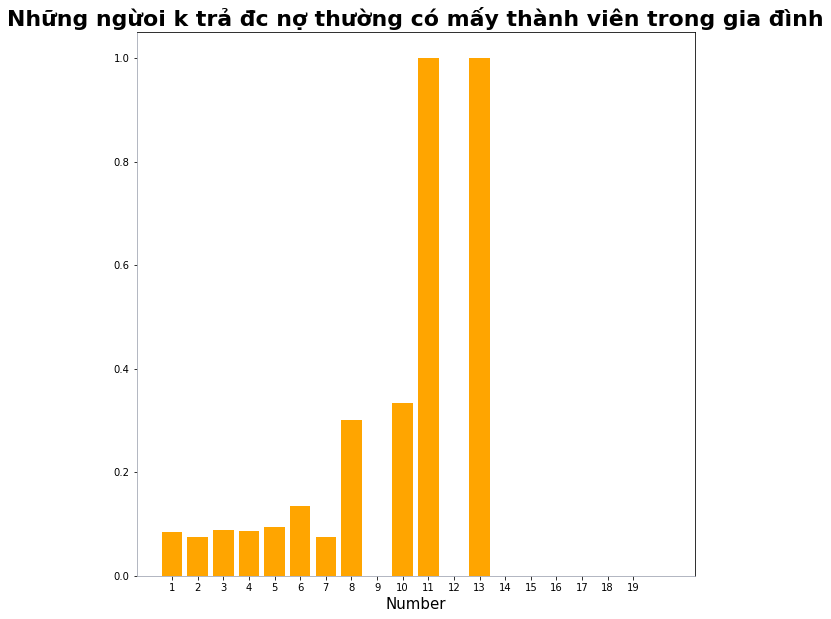

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.bar(perc_fam_mem['CNT_FAM_MEMBERS'], perc_fam_mem['TARGET'],color ='orange')
ax.spines[['top', "right", 'left']].set_visible(True)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')
ax.set_xticks(np.arange(1, 20,1))

ax.set_xlabel('Number', size = "15")
ax.set_title('Những ngừoi k trả đc nợ thường có mấy thành viên trong gia đình', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")




# Có 2 khách hàng có quy mô gia đình 11 và 13, cả 2 người đấy đều k trả  đc nợ nên tỷ lệ không trả nợ là  100%. Các gia đình khác có 10 hoặc 8 thành viên có tỷ lệ không trả được nợ trên 30%. Các gia đình có 6 thành viên trở xuống có tỷ lệ trả nợ gần mức trung bình 10%.

In [61]:
application_train[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

,ORGANIZATION_TYPE,NAME_INCOME_TYPE
0,Business Entity Type 3,Working
1,School,State servant
2,Government,Working
3,Business Entity Type 3,Working
4,Religion,Working
5,Other,State servant
6,Business Entity Type 3,Commercial associate
7,Other,State servant
8,XNA,Pensioner
9,Electricity,Working


# Ở đây, ta thấy rằng bất cứ nơi nào NAME_INCOME_TYPE là Pensioner thì ở đó chỉ chúng ta có giá trị null trong cột ORGANIZATON_TYPE. Hãy xem số lượng Pensioner và sau đó chúng tôi sẽ quyết định có áp dụng giá trị rỗng của ORGANIZATION_TYPE với Pensioner hay không.

In [62]:
application_train.NAME_INCOME_TYPE.value_counts()    #Check the counts for each in NAME_INCOME_TYPE

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

# Vì vậy, từ những dữ liệu này, ta có thể kết luận rằng giá trị Pensioner xấp xỉ bằng giá trị rỗng trong cột ORGANIZATION_TYPE. Vì vậy, giá trị bị thiếu ở mức nào đó
# Tương tự như vậy việc áp giá trị rỗng của OCCUPATION_TYPE với Pensioner vì hầu hết các giá trị rỗng cho OCCUPATION_TYPE so với giá trị biến loại Income, ta nhận thấy rằng “Pensioner” là giá trị thường xuyên nhất, gần như 80% giá trị rỗng của OCCUPATION_TYPE

In [63]:
#application_train['ORGANIZATION_TYPE'] = application_train['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
#application_train['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [64]:
nbr_icome_type = application_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).count()

In [65]:
nbr_icome_type

,NAME_INCOME_TYPE,TARGET
0,Businessman,10
1,Commercial associate,71617
2,Maternity leave,5
3,Pensioner,55362
4,State servant,21703
5,Student,18
6,Unemployed,22
7,Working,158774


Text(0.5, 0, 'Number')

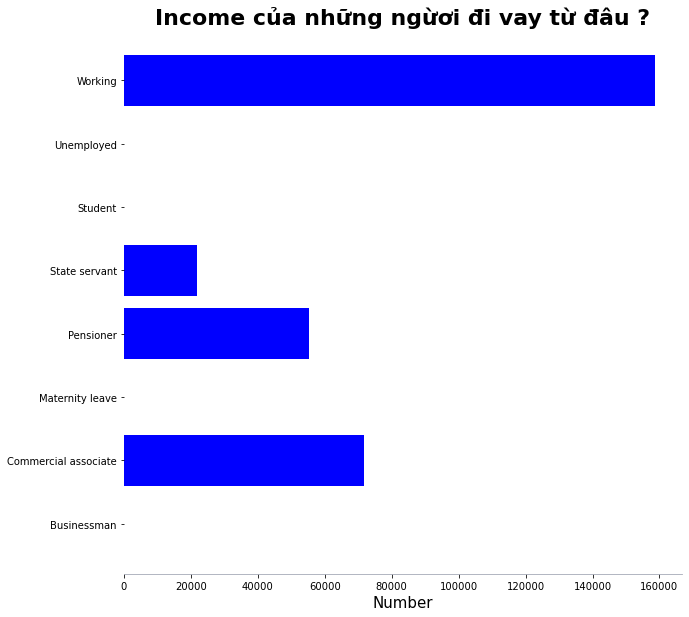

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.barh(nbr_icome_type['NAME_INCOME_TYPE'], nbr_icome_type['TARGET'],color ='blue')
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')


ax.set_xlabel('Number', size = "15")
ax.set_title('Income của những ngừơi đi vay từ đâu ?', weight = 'bold', size="22")
ax.set_xlabel('Number', size = "15")


# # Hầu hết những người nộp đơn cho khoản vay là thu nhập từ Working, tiếp theo là Commercial asscociate, Pensioner và State servant 

In [67]:
perc_income_type = application_train[['NAME_INCOME_TYPE', 'TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean()

Text(0.5, 0, '%')

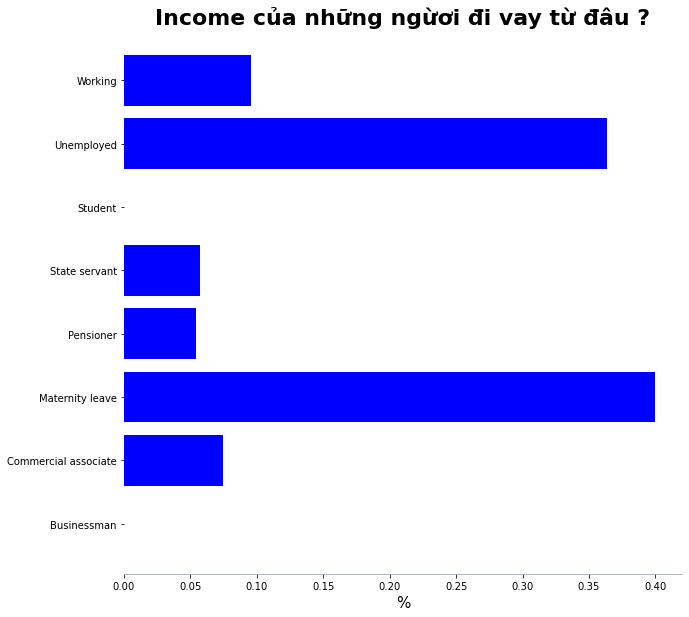

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ["#1E90FF", "#4682B4"]*6

ax.barh(perc_income_type['NAME_INCOME_TYPE'], perc_income_type['TARGET'],color ='blue')
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')



ax.set_title('Income của những ngừơi đi vay từ đâu ?', weight = 'bold', size="22")
ax.set_xlabel('%', size = "15")



# Những người nộp đơn với loại thu nhập Nghỉ thai sản có tỷ lệ không trả lại khoản vay gần 40%, tiếp theo là Thất nghiệp (37%). Các loại thu nhập còn lại đều ở mức trung bình dưới 10% do không trả lại các khoản cho vay.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

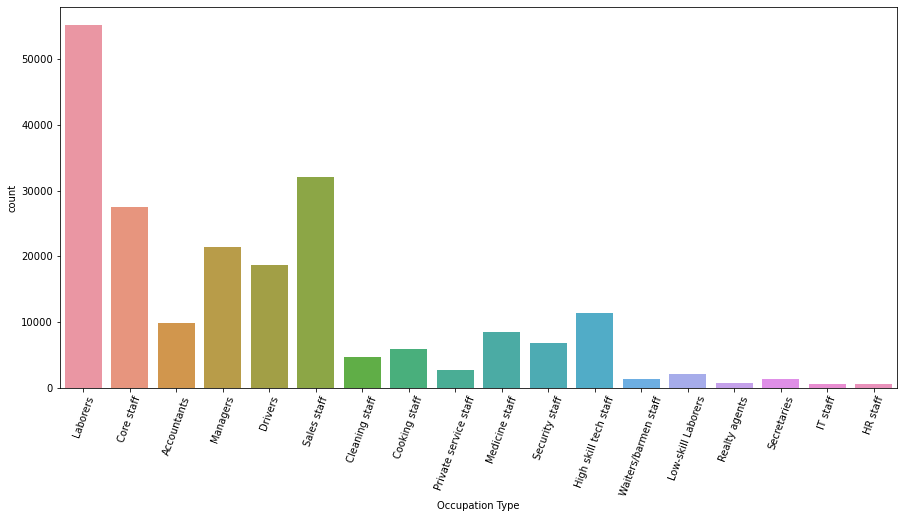

In [69]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=application_train)
plt.xlabel("Occupation Type")
plt.xticks(rotation=70)

# Hầu hết người đi vay là người lao động và ít nhất là Nhân viên IT

In [70]:
perc_occupation_type = application_train[['OCCUPATION_TYPE', 'TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean()

Text(0.5, 0, '%')

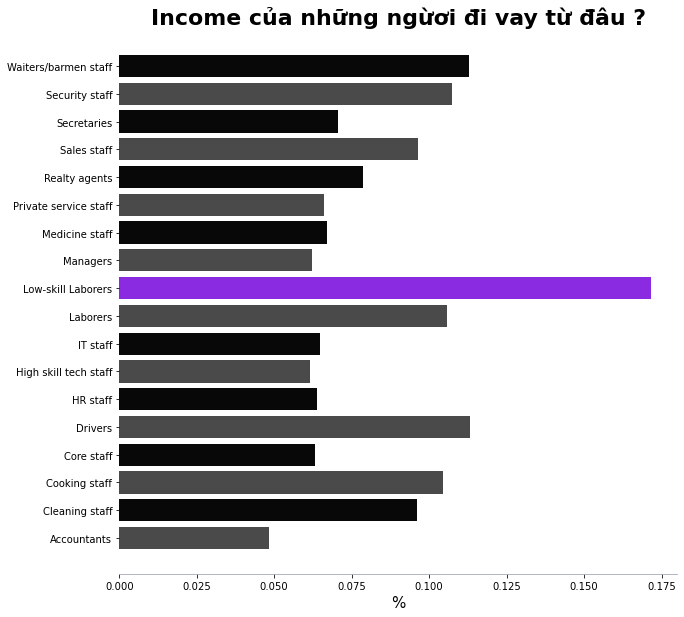

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

color = ['#4A4A4A', "#080808"]*9
color[9] = "#8A2BE2"

ax.barh(perc_occupation_type['OCCUPATION_TYPE'], perc_occupation_type['TARGET'],color =color)
ax.spines[['top', "right", 'left']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#a1a6b3')



ax.set_title('Income của những ngừơi đi vay từ đâu ?', weight = 'bold', size="22")
ax.set_xlabel('%', size = "15")


# Nhóm có tỷ lệ khoản vay không được hoàn trả cao nhất là Lao động trình độ thấp (trên 17%), tiếp theo là Lái xe và Nhân viên phục vụ / barmen, Nhân viên bảo vệ, Nhân viên lao động và Nhân viên nấu ăn.

Text(0, 0.5, 'Average Annual family income')

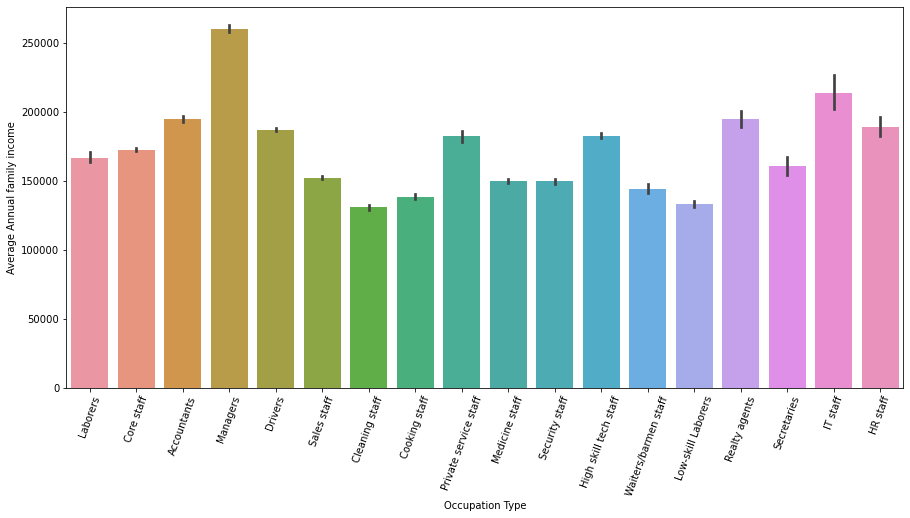

In [72]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=application_train)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

# Những người đi vay có kinh tế như thế nào? Ai là người ổn định nhất và kém nhất?

# Manager là người đi vay kiếm nhiều tiền nhất trong khi nhân viên dọn vệ sinh là người đi vay kiếm tiền ít nhất - Dựa trên thu nhập hàng năm của gia đình.

In [73]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

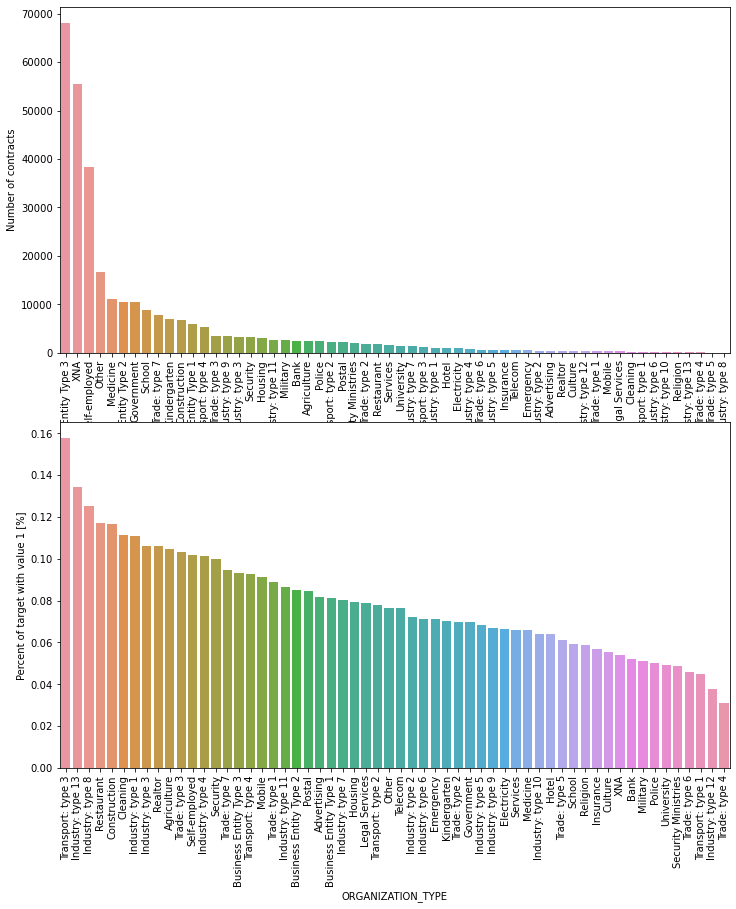

In [74]:
plot_stats('ORGANIZATION_TYPE',True, False)

# Các tổ chức có tỷ lệ nợ không hoàn trả cao nhất là Transport: type 3 (16%), Indusrty: type 13 (13,5%), Industry: type 8 (12,5%) và Restaurant (dưới 12%).

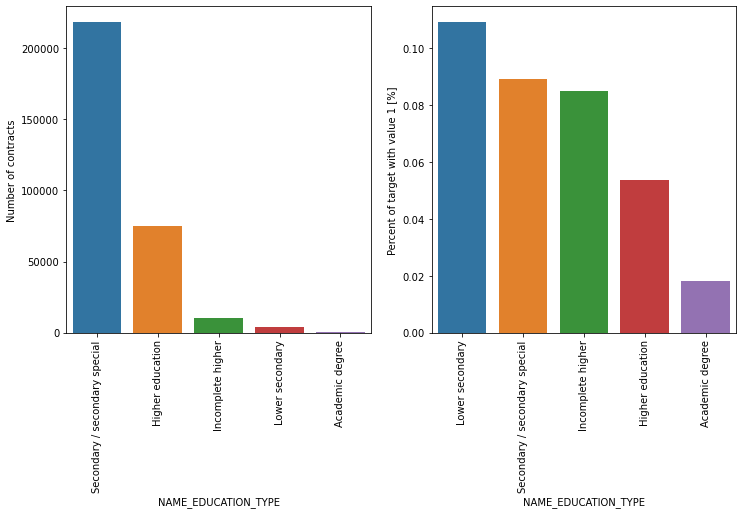

In [75]:
plot_stats('NAME_EDUCATION_TYPE',True)

# Đa số người vay có trình độ trung học cơ sở / trung học đặc biệt, tiếp theo là các khách hàng có trình độ đại học. Chỉ một số rất nhỏ có bằng cấp.

# Nhóm trung học cơ sở, mặc dù hiếm, có tỷ lệ không trả lại khoản vay lớn nhất (11%). Những người có bằng Học vấn có tỷ lệ không hoàn trả dưới 2%.

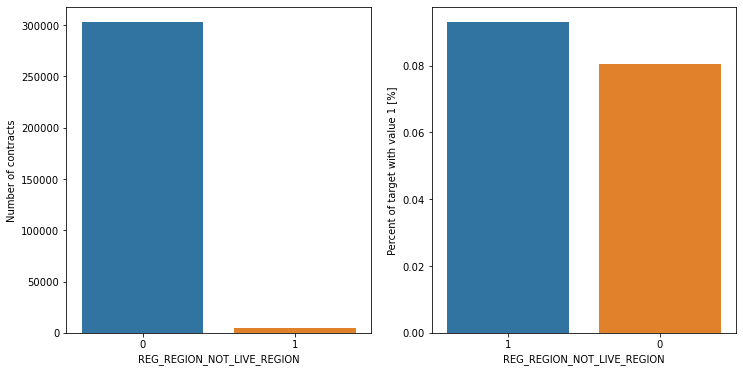

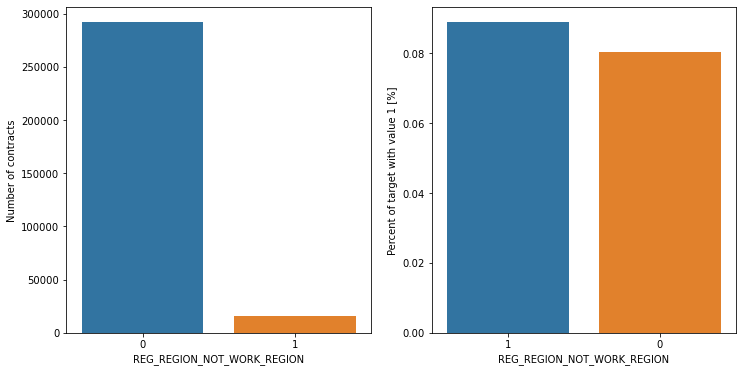

In [76]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

# Rất ít người được đăng ký trong khu vực không sinh sống hoặc không làm việc. Nói chung, tỷ lệ không quay lại đối với những trường hợp này lớn hơn một chút so với những trường hợp còn lại (trên 8% một chút so với khoảng 8%)

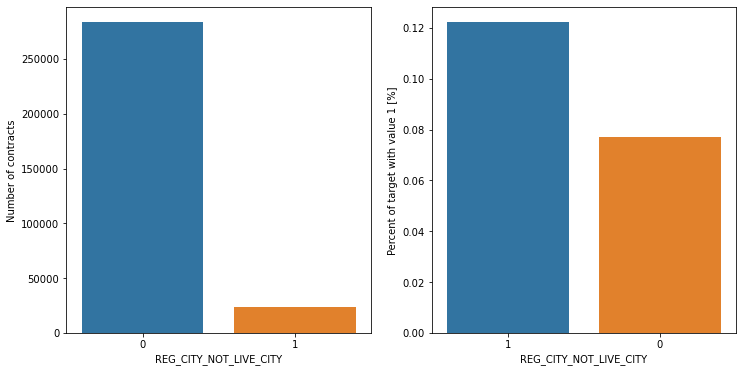

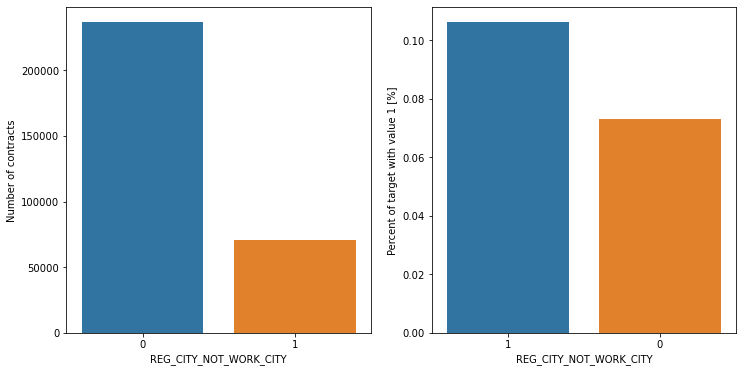

In [77]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

# Nói chung, có nhiều người đăng ký tại thành phố họ sống hoặc làm việc hơn (một số lượng lớn đăng ký ở thành phố làm việc khác với thành phố đang sống).

# Những người đăng ký ở thành phố khác với thành phố đang làm việc hoặc sinh sống thường không trả được khoản vay hơn những người đăng ký cùng thành phố (nơi làm việc 11% hoặc sinh sống 12%).

In [78]:
corr0=application_train.iloc[0:,2:]
corr1=application_train.iloc[0:,2:]

t0=corr0.corr(method='spearman')   # t0 - Corelations distibuted according rank wise for target 0
t1=corr1.corr(method='spearman')   # t1 - Corelations distibuted according rank wise for target 1

In [79]:
def targets_corr (data,title):
    plt.figure(figsize= (15, 10))
    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax= sns.heatmap(data, mask=mask, cmap= 'Blues')

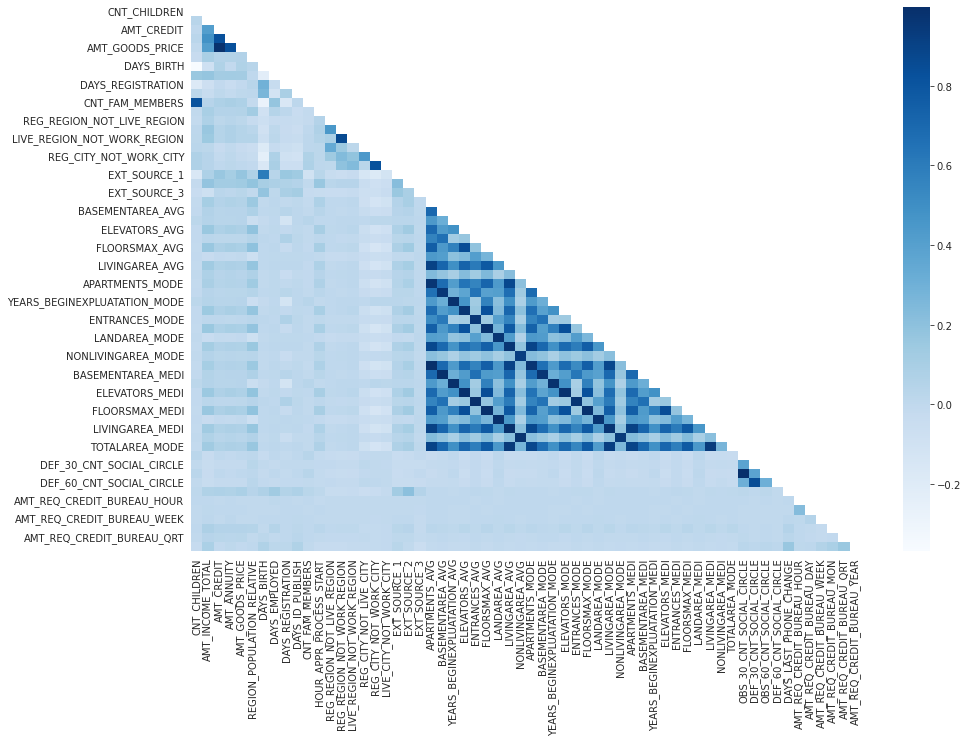

In [80]:
targets_corr(data=t0,title='Correlation for Target 0')

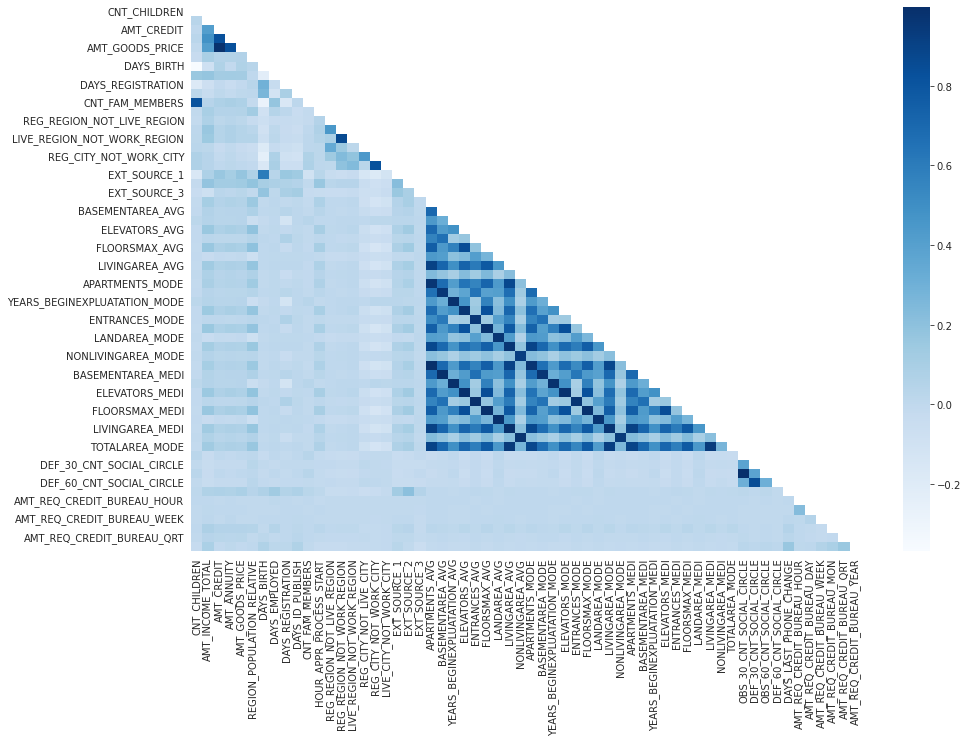

In [81]:
targets_corr(data=t1,title='Correlation for Target 1')

In [82]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(application_train, title="Pandas Profiling Report for Titanic train dataset")
profile.to_file("../data_to_web/titanic_train_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
profile